# Data analysis of the... data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
%matplotlib inline
pd.set_option("display.max_columns", None)

## Exploratory data analysis

In [41]:
# Import the dataset
full_df = pd.read_csv("C:/FYP/Analysis/Excel analysis/No norm, average IgE/linear_edge+5000.csv")
full_df.head()

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,IgE 500,IgE 250,IgE 125,IgE 62.5,IgE 31.25,IgE 15.625,IgE 7.8125,IgE 3.90625,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,Soy,Peas,Mung beans,Faba beans,Shiitake mushroom,Chickpea,Onion,Potato,Barley,Carrot,Brown rice,Basmati rice,White rice,Jasmine rice,Sushi rice,Wheat germ,Chicken breast,Soy #,Peas #,Mung beans #,Faba beans #,Shiitake #,Chickpea #,Onion #,Potato #,Barley #,Carrot #,Brown rice #,Basmati rice #,White rice #,Jasmine rice #,Sushi rice #,Wheat germ #,Chicken breast #,Q Garlic and Herb Fillets,Q Southern Fried Burgers,Q Hot and Spicy Burger,Q Brilliant Burgers,Q Garlic and Mushroom Escalope,Q Swedish style Balls,Q Crispy Nuggets,Q Sausages,Q Vegan Fillets,Q Southern Fried Bites,Q Mince,Q Pieces,F No-Meatballs,F The Big Fry Burger,F Fish Style Fillets,F Mediterranean Style Artisan Sausage,F Breakfast Bangers,F Golden Schnitzel,F Chicken Strips,F Spiced Burger,F Braai Sausages,F Chicken Nuggets,F Chicken Burgers,F Traditional Sausages,F Rice Protein and Chia Nuggets,F Traditional Burgers,F Soy and Flaxseed Schnitzels,F Spicy Sausages,F Quinoa and Brown Rice Burgers,F Battered Prawn Style Pieces,F Thick Cut Chunky Strips,F Mince,MM Burger,MM Hotdog,MM Meatballs,H Mediterranean chunks,Cultured meat,Q Garlic and Herb Fillets #,Q Southern Fried Burgers #,Q Hot and Spicy Burger #,Q Brilliant Burgers #,Q Garlic and Mushroom Escalope #,Q Swedish style Balls #,Q Crispy Nuggets #,Q Sausages #,Q Vegan Fillets #,Q Southern Fried Bites #,Q Mince #,Q Pieces #,F No-Meatballs #,F The Big Fry Burger #,F Fish Style Fillets #,F Mediterranean Style Artisan Sausage #,F Breakfast Bangers #,F Golden Schnitzel #,F Chicken Strips #,F Spiced Burger #,F Braai Sausages #,F Chicken Nuggets #,F Chicken Burgers #,F Traditional Sausages #,F Rice Protein and Chia Nuggets #,F Traditional Burgers #,F Soy and Flaxseed Schnitzels #,F Spicy Sausages #,F Quinoa and Brown Rice Burgers #,F Battered Prawn Style Pieces #,F Thick Cut Chunky Strips #,F Mince #,MM Burger #,MM Hotdog #,MM Meatballs #,H Mediterranean chunks #,Cultured meat #,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT COH,BSF-WT SBM,NC11,NC15,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,AF Chik'n Nugget,AF Chik'n Burger,v Classic Burger,v Chicken Burgers,v Bacon Bits,v Meatballs,v Mince,E Veg Ku Loh Meat,G Teriyaki Chick'N Strips,G Vegetarian Crabless cakes,S Mince,S Chicken style pieces,S Meat Burger,L Vegetarian Sausages,L Red Onion and Rosemary Sausages,B Mince,B Burger,B Original Sausage,B Italian Sausage,Y Luncheon meat,Y Mince meat,OM All Purpose,OM Strips,OM Luncheon,BRM Soy protein,TS Pea protein,TS Brown rice protein,O Chocolate plant protein powder,C Cricket protein powder,N Cricket flour,AIFS Cricket flour,SG Canned BSF,SG Dried BSF,SG Dried Crickets,IFT Dried BSF Larvae,Insectta BSF meal,AF Chik'n Nugget #,AF Chik'n Burger #,v Classic Burger #,v Chicken Burgers #,v Bacon Bits #,v Meatballs #,v Mince #,E Veg Ku Loh Meat #,G Teriyaki Chick'N Strips #,G Vegetarian Crabless cakes #,S Mince #,S Chicken style pieces #,S Meat Burger #,L Vegetarian Sausages #,L Red Onion and Rosemary Sausages #,B Mince #,B Burger #,B Original Sausage #,B Italian Sausage #,Y Luncheon meat #,Y Mince meat #,OM All Purpose #,OM Strips #,OM Luncheon #,BRM Soy protein #,TS Pea protein #,TS Brown rice protein #,O Chocolate plant protein powder #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [42]:
full_df.columns

Index(['ID', 'Panel', 'Batch', 'BSA', 'BB (with Urea)', 'BB (without Urea)',
       'PBS', 'PBS + Glycerol', 'pET32 (a) vector', 'IgE 1000',
       ...
       'SG Dried Crickets #', 'IFT Dried BSF Larvae #', 'Insectta BSF meal #',
       'BSF-D M<P', 'BSF-WT OKA', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS',
       'BSF-D COH', 'NC10'],
      dtype='object', length=246)

### Sanity check

We do this by plotting and finding the correlation between the dust mite crudes
It should be rather correlated

Equation: y = 1.0738891389288403*x + 56.74502579298132
R2: 0.7539081001475337


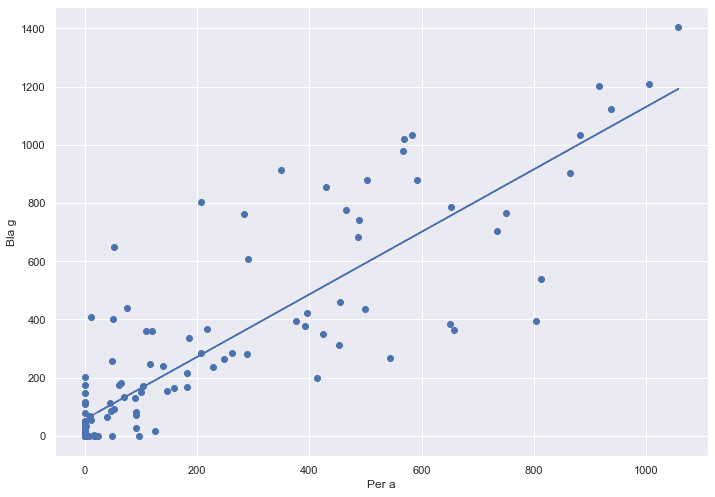

In [44]:
# Test new IgE curve
y = full_df["Der f"]
x = full_df["Der p"]

# Plot scatterplot
plt.scatter(x, y)

# Add trendline
degree = 1
# m, b = np.polyfit(ige_level, ige, degree)
m, b, r, p_value, se = stats.linregress(x, y)
plt.plot(x, m*x + b)

plt.xlabel("Per a")
plt.ylabel("Bla g")

# Print equation and R2
print(f"Equation: y = {m}*x + {b}")
print(f"R2: {r ** 2}")

Split up the dataset into its groups
- Plant-based
- Fungal-based
- Insect-based
- Cultured meat

In [69]:
# Do some column shifting to make it easier to split

# 31 to 47 (Soy to wheat germ), 77 to 101 (plant foods), 
# 167 to 195 (plant foods)
plant_df = pd.concat([full_df.iloc[:,31:47], full_df.iloc[:,77:101], 
                      full_df.iloc[:,167:191]], axis=1)
# 48 to 64 (cooked veg), 114 to 138 (cooked plant foods), 
# 203 to 231 (cooked plant foods)
plant_cooked = pd.concat([full_df.iloc[:,48:64], full_df.iloc[:,114:138], 
                          full_df.iloc[:,203:231]], axis=1)

# 35 (shiitake), 65 to 77 (Quorn)
fungal_df = pd.concat([full_df.iloc[:,35], full_df.iloc[:,65:77]], 
                      axis=1)
# 52 (cooked shiitake), 102 to 114 (cooked Quorn)
fungal_cooked = pd.concat([full_df.iloc[:,52], full_df.iloc[:,102:114]], 
                          axis=1)

# 18 to 31 (insect and seafood crudes/allergens), 142 to 147 (cricket and BSF
# proteins), 139 to 142 (BSF WT), 147 to 150 (BSF WT), 240 (BSF WT), 
# 239 (BSF D), 241 to 246 (BSF D and cricket), 150 to 152 (cricket),
# 195 to 203 (insect products)
insect_df = pd.concat([full_df.iloc[:,18:31], full_df.iloc[:,142:147],
                       full_df.iloc[:,139:142], full_df.iloc[:,147:150],
                       full_df.iloc[:,240], full_df.iloc[:,239],
                       full_df.iloc[:,241:246], full_df.iloc[:,150:152],
                       full_df.iloc[:,195:203]], 
                      axis=1)
# Shift around so that BSF and cricket stuff are separate
insect_df = insect_df[['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'SGC Arginine kinase', 'BSF-WT CF70', 'BSF-WT P', 'BSF-WT PKM',
       'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH', 
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF', 'SG Dried BSF',
       'NC10', 'NC11', 'NC15', 'C Cricket protein powder', 'N Cricket flour',
       'SG Dried Crickets', 'AIFS Cricket flour']]
# 152 to 167 (cooked BSF WT, BSF D, cricket), 231 to 239 (cooked insect products)
insect_cooked = pd.concat([full_df.iloc[:,152:167], full_df.iloc[:,231:239]], 
                          axis=1)

cultured_df = full_df[["Chicken breast", "Cultured meat"]]
cultured_cooked = full_df[["Chicken breast #", "Cultured meat #"]]

In [46]:
insect_df.columns

Index(['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'SGC Arginine kinase', 'BSF-WT P', 'BSF-WT PKM',
       'BSF-WT M<P', 'BSF-WT CF70', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour'],
      dtype='object')

Plot some correlation within each dataset

Some parts of the heat map have empty rows/columns. This means that their values are all 0

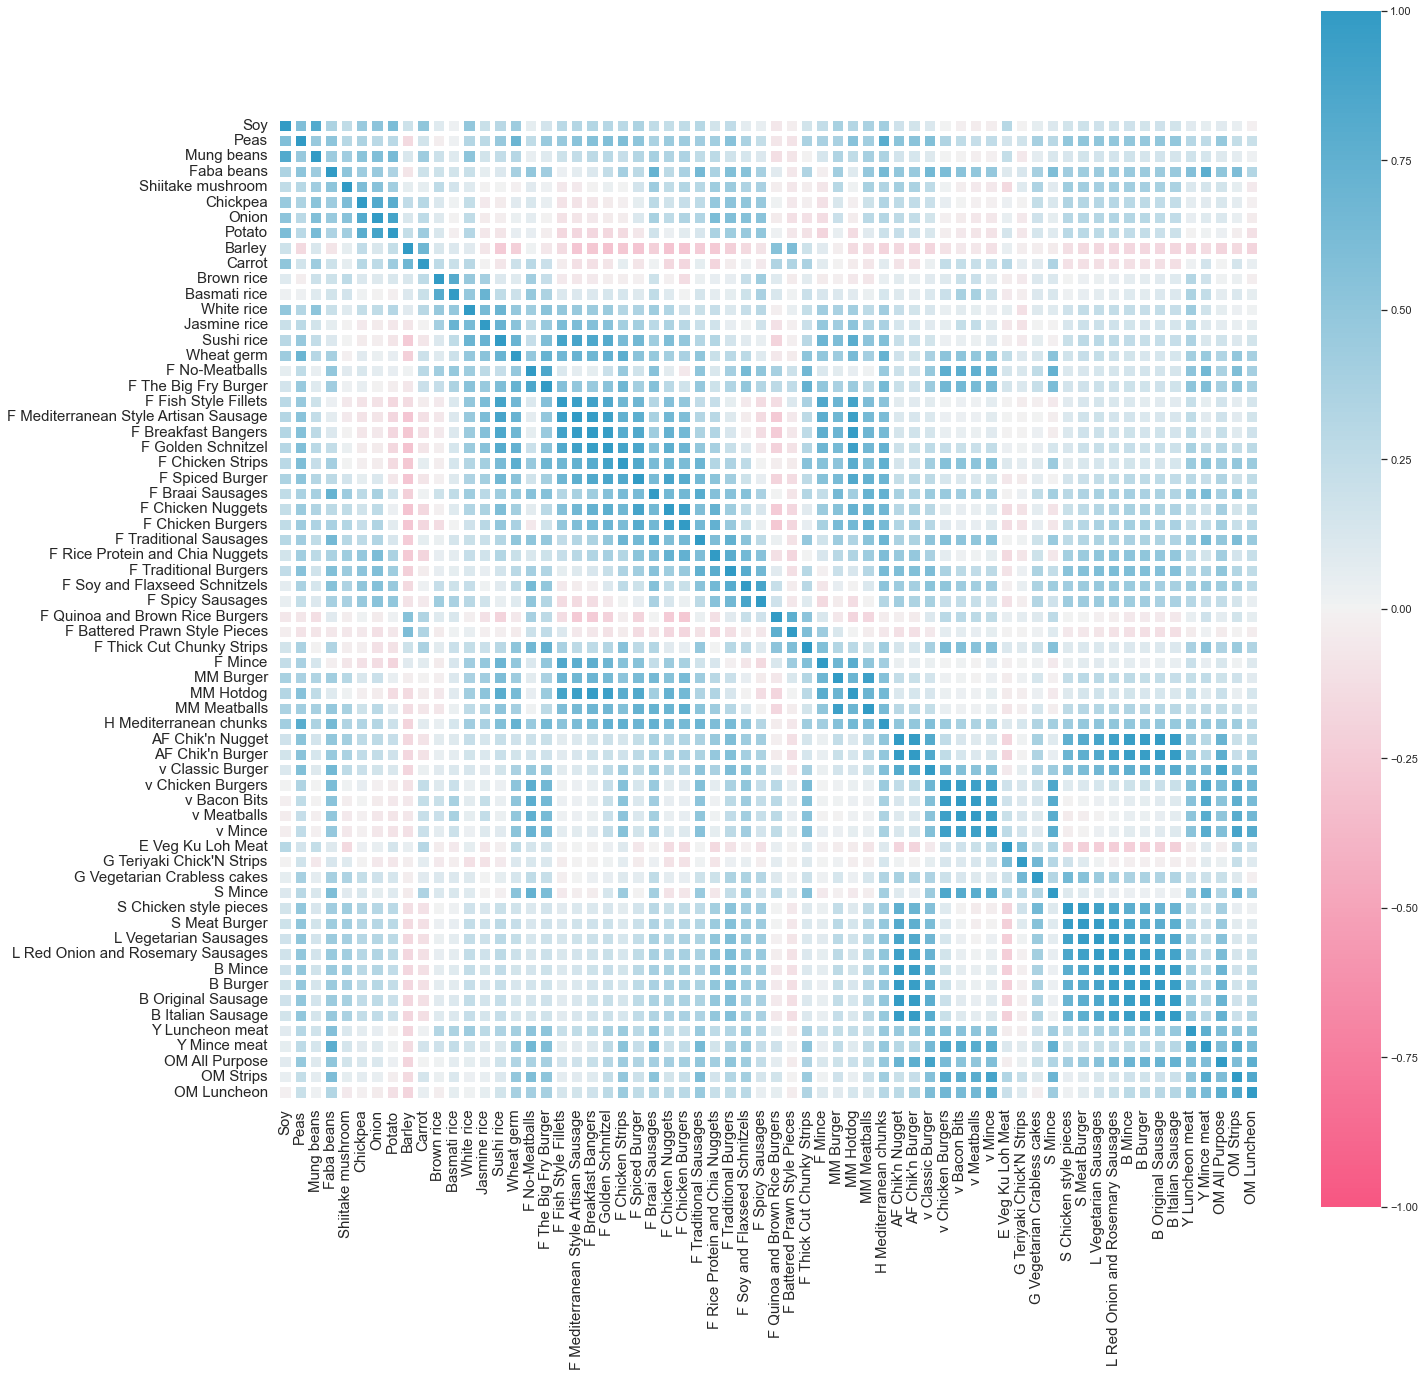

In [47]:
# Heat map with seaborn
# dataset to work on
df = plant_df

plt.figure(figsize = (22,22))
# Color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
corrMatrix = df.corr()

hm = sns.heatmap(corrMatrix, linewidths=5, cmap=cmap, square=True, vmin=-1, vmax=1)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=15)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Swarmplots

In [6]:
# Import absorbance datasets
panel1_abs = pd.read_csv("C:/FYP/Analysis/Excel analysis/No norm, average IgE/linear_scaled/1-full-pbs-minus.csv")
panel2_abs = pd.read_csv("C:/FYP/Analysis/Excel analysis/No norm, average IgE/linear_scaled/2-full-pbs-minus.csv")

In [7]:
# The panels have to be converted into 2 columns: Absorbance and allergen
# Remove blank
panel1_abs = panel1_abs[panel1_abs["ID"] != "B"]
panel2_abs = panel2_abs[panel2_abs["ID"] != "B"]

# Melt them using ID as the id_vars
panel1_melt = pd.melt(panel1_abs, id_vars=["ID"], 
                      value_vars=panel1_abs.columns[16:])
panel2_melt = pd.melt(panel2_abs, id_vars=["ID"], 
                      value_vars=panel2_abs.columns[16:])

In [11]:
panel1_melt.shape

(15851, 3)

In [8]:
# Split the columns into groups of 10
columns1 = []
columns2 = []

groupin = 10

i = 0
while i < len(panel1_melt["variable"].unique())-1:
    columns = []
    for j in range(groupin):
        columns.append(panel1_melt["variable"].unique()[i])
        i += 1
        if i > len(panel1_melt["variable"].unique())-1:
            break
    columns1.append(columns)
    
i = 0
while i < len(panel2_melt["variable"].unique())-1:
    columns = []
    for j in range(groupin):
        columns.append(panel2_melt["variable"].unique()[i])
        i += 1
        if i > len(panel2_melt["variable"].unique())-1:
            break
    columns2.append(columns)

In [9]:
# Find the max and min values for better plotting
print(f"Panel 1 max: {panel1_melt.max()}")
print(f"Panel 1 min: {panel1_melt.min()}")
print(f"Panel 2 max: {panel2_melt.max()}")
print(f"Panel 2 min: {panel2_melt.min()}")

Panel 1 max: ID                     8
variable    White rice #
value        224873.0834
dtype: object
Panel 1 min: ID                    1
variable         Barley
value      -107029.6375
dtype: object
Panel 2 max: ID                    8
variable      v Mince #
value       275558.8702
dtype: object
Panel 2 min: ID                         1
variable    AF Chik'n Burger
value           -77294.27376
dtype: object


In [74]:
columns1[0]

['Der p 10',
 'Der p 20',
 'Der f 10',
 'Blo t 10',
 'Blo t 20',
 'Der p',
 'Der f',
 'Blo t',
 'Bla g',
 'Per a']

(-100000.0, 250000.0)

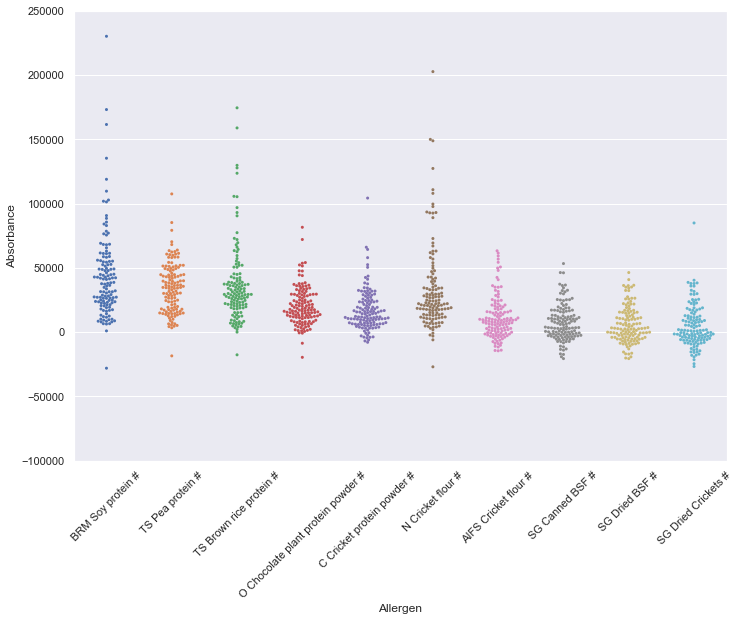

In [10]:
# sns.violinplot(x="variable", y="value", data=panel1_melt.iloc[2000:4000,:])
# sns.stripplot(x="variable", y="value", data=panel1_melt.iloc[2000:4000,:])
sns.set(rc={'figure.figsize':(11.7,8.27)})

data = panel2_melt[panel2_melt.variable.isin(columns2[10])]

sns.swarmplot(x="variable", y="value", data=data,
              size=3)

plt.xticks(rotation=45)
plt.ylabel("Absorbance")
plt.xlabel("Allergen")

ax = plt.gca()
ax.set_ylim([-100000, 250000])

### Determine sensitisation cut-off

Might have to remove outliers if some controls have overly high values

In [49]:
control_id = [1, 2, 4, 10, 14, 15, 27, 61, 74, 131, 142, 146, 162, 169, 219, 220, 266, 351, 427, 489, 520, 728, 738]
control_df = full_df[full_df["ID"].isin(control_id)]
control_df.head()

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,IgE 500,IgE 250,IgE 125,IgE 62.5,IgE 31.25,IgE 15.625,IgE 7.8125,IgE 3.90625,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,Soy,Peas,Mung beans,Faba beans,Shiitake mushroom,Chickpea,Onion,Potato,Barley,Carrot,Brown rice,Basmati rice,White rice,Jasmine rice,Sushi rice,Wheat germ,Chicken breast,Soy #,Peas #,Mung beans #,Faba beans #,Shiitake #,Chickpea #,Onion #,Potato #,Barley #,Carrot #,Brown rice #,Basmati rice #,White rice #,Jasmine rice #,Sushi rice #,Wheat germ #,Chicken breast #,Q Garlic and Herb Fillets,Q Southern Fried Burgers,Q Hot and Spicy Burger,Q Brilliant Burgers,Q Garlic and Mushroom Escalope,Q Swedish style Balls,Q Crispy Nuggets,Q Sausages,Q Vegan Fillets,Q Southern Fried Bites,Q Mince,Q Pieces,F No-Meatballs,F The Big Fry Burger,F Fish Style Fillets,F Mediterranean Style Artisan Sausage,F Breakfast Bangers,F Golden Schnitzel,F Chicken Strips,F Spiced Burger,F Braai Sausages,F Chicken Nuggets,F Chicken Burgers,F Traditional Sausages,F Rice Protein and Chia Nuggets,F Traditional Burgers,F Soy and Flaxseed Schnitzels,F Spicy Sausages,F Quinoa and Brown Rice Burgers,F Battered Prawn Style Pieces,F Thick Cut Chunky Strips,F Mince,MM Burger,MM Hotdog,MM Meatballs,H Mediterranean chunks,Cultured meat,Q Garlic and Herb Fillets #,Q Southern Fried Burgers #,Q Hot and Spicy Burger #,Q Brilliant Burgers #,Q Garlic and Mushroom Escalope #,Q Swedish style Balls #,Q Crispy Nuggets #,Q Sausages #,Q Vegan Fillets #,Q Southern Fried Bites #,Q Mince #,Q Pieces #,F No-Meatballs #,F The Big Fry Burger #,F Fish Style Fillets #,F Mediterranean Style Artisan Sausage #,F Breakfast Bangers #,F Golden Schnitzel #,F Chicken Strips #,F Spiced Burger #,F Braai Sausages #,F Chicken Nuggets #,F Chicken Burgers #,F Traditional Sausages #,F Rice Protein and Chia Nuggets #,F Traditional Burgers #,F Soy and Flaxseed Schnitzels #,F Spicy Sausages #,F Quinoa and Brown Rice Burgers #,F Battered Prawn Style Pieces #,F Thick Cut Chunky Strips #,F Mince #,MM Burger #,MM Hotdog #,MM Meatballs #,H Mediterranean chunks #,Cultured meat #,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT COH,BSF-WT SBM,NC11,NC15,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,AF Chik'n Nugget,AF Chik'n Burger,v Classic Burger,v Chicken Burgers,v Bacon Bits,v Meatballs,v Mince,E Veg Ku Loh Meat,G Teriyaki Chick'N Strips,G Vegetarian Crabless cakes,S Mince,S Chicken style pieces,S Meat Burger,L Vegetarian Sausages,L Red Onion and Rosemary Sausages,B Mince,B Burger,B Original Sausage,B Italian Sausage,Y Luncheon meat,Y Mince meat,OM All Purpose,OM Strips,OM Luncheon,BRM Soy protein,TS Pea protein,TS Brown rice protein,O Chocolate plant protein powder,C Cricket protein powder,N Cricket flour,AIFS Cricket flour,SG Canned BSF,SG Dried BSF,SG Dried Crickets,IFT Dried BSF Larvae,Insectta BSF meal,AF Chik'n Nugget #,AF Chik'n Burger #,v Classic Burger #,v Chicken Burgers #,v Bacon Bits #,v Meatballs #,v Mince #,E Veg Ku Loh Meat #,G Teriyaki Chick'N Strips #,G Vegetarian Crabless cakes #,S Mince #,S Chicken style pieces #,S Meat Burger #,L Vegetarian Sausages #,L Red Onion and Rosemary Sausages #,B Mince #,B Burger #,B Original Sausage #,B Italian Sausage #,Y Luncheon meat #,Y Mince meat #,OM All Purpose #,OM Strips #,OM Luncheon #,BRM Soy protein #,TS Pea protein #,TS Brown rice protein #,O Chocolate plant protein powder #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [50]:
# Choose which allergen to determine the cut off
allergen = "Der p"

# Get mean and SD
mean = control_df[allergen].mean()
sd = control_df[allergen].std()

# Cut-off = mean + 2 SD
cut_off = mean + 2*sd
print(cut_off)

60.178855150788465


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Der p'>

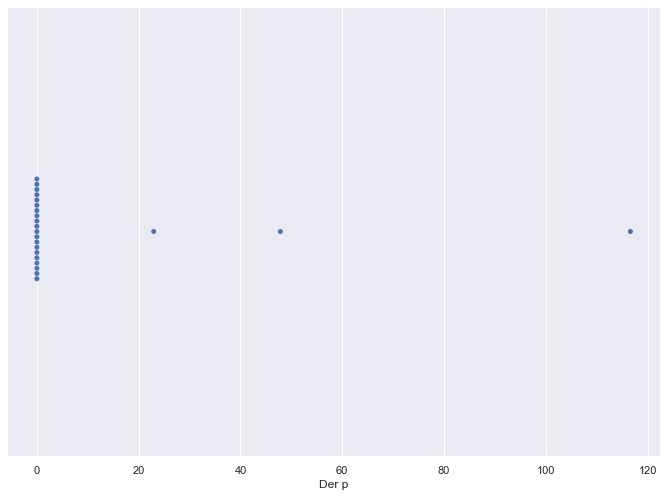

In [51]:
sns.swarmplot(control_df["Der p"])

## 1st Level: Sensitisation to Novel Foods

Universal boxplot function to use for EVERYTHING

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/

According to this, seems like Spearman Rank correlation is the way to go.
Or Mann-Whitney U test - https://statistics.laerd.com/statistical-guides/mann-whitney-u-test-assumptions.php



In [ ]:
!pip install statannotations

In [128]:
from statannotations.Annotator import Annotator

def ezboxplot(separator, allergen, cutoff, df):
    new_df = df.filter([separator, allergen], axis=1)
    
    # Function to categorise into sensitised to separator, and not
    def categorise(row):
        if row[separator] > cutoff:
            return "Yes"
        else:
            return "No"
        
    new_df["Sensitised"] = new_df.apply(categorise, axis=1)
    
    # Split into 2 and print out stats
    sensitised_df = new_df[new_df["Sensitised"] == "Yes"]
    no_sensitised_df = new_df[new_df["Sensitised"] == "No"]
    
    # print(f"Sensitised mean: {sensitised_df[allergen].mean()}, SD: {sensitised_df[allergen].std()}")
    # print(f"Not sensitised mean: {no_sensitised_df[allergen].mean()}, SD: {no_sensitised_df[allergen].std()}")

    u, p = stats.mannwhitneyu(sensitised_df[allergen], no_sensitised_df[allergen])
    # print(u, p)
    
    ax = sns.boxplot(x="Sensitised", y=allergen, data=new_df)
    pairs = [("Yes", "No")]
    annotator = Annotator(ax, pairs, data=new_df, x="Sensitised",
                          y=allergen)
    annotator.configure(text_format="simple")
    annotator.set_pvalues_and_annotate([p])
    
    plt.xlabel(f"Sensitised to {separator}")
    plt.ylabel("sIgE (IU/mL)")
    # plt.xticks([0, 1], ["No", "Yes"])
    
    print(new_df["Sensitised"].value_counts())

No vs. Yes: Custom statistical test, P_val:2.348e-02
No     96
Yes    35
Name: Sensitised, dtype: int64


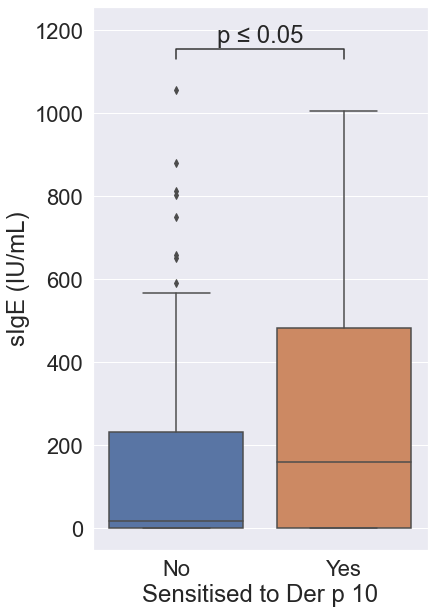

In [129]:
test = ezboxplot("Der p 10", "Der p", cut_off, full_df)

In [21]:
test["Sensitised"].value_counts()

0    111
1     20
Name: Sensitised, dtype: int64

Initial distribution of the different classes of foods (average) compared to Der p, Der f, Blo t

In [61]:
# Function for swarmplots
def plot_swarm(df, cut_off, xlabel, ylabel):
    graph = sns.swarmplot(x="variable", y="value", data=pd.melt(df),
                          size=2)
    graph.axhline(y=cut_off, color="red")
    ax = plt.gca()
    ax.set_ylim([0, 1000])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.2% of the points cann

Text(0, 0.5, 'Average sIgE (IU/mL)')

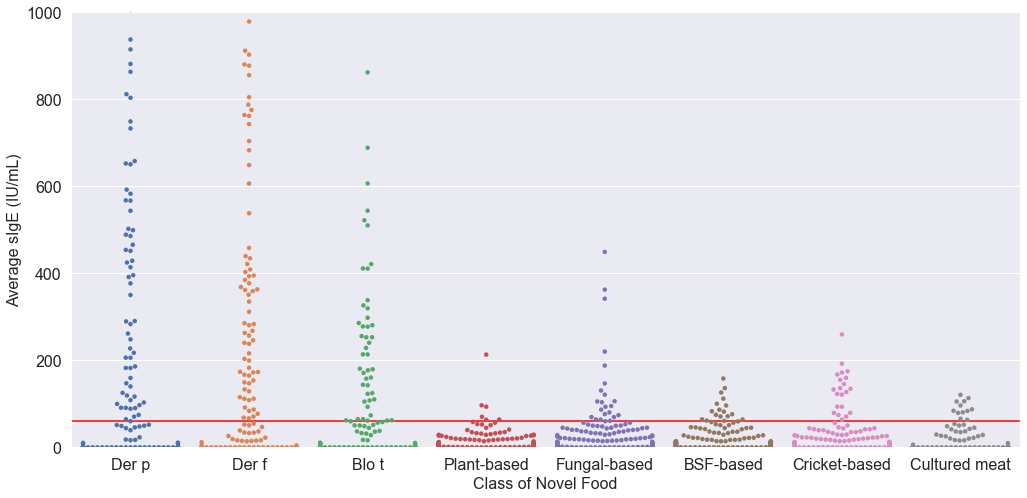

In [82]:
# We use the full dataset for this - full_df
# Create new columns for average IgE for each class of food
plant_df["Average"] = plant_df.iloc[:,16:].mean(numeric_only=True, axis=1)
fungal_df["Average"] = fungal_df.iloc[:,1:].mean(numeric_only=True, axis=1)
insect_df["BSF Average"] = insect_df.iloc[:,18:34].mean(numeric_only=True, axis=1)
insect_df["Cric Average"] = insect_df.iloc[:,34:41].mean(numeric_only=True, axis=1)

# Create dataframe for all averages and dust mites
ini_df = pd.DataFrame({
    "Der p": full_df["Der p"], 
    "Der f": full_df["Der f"], 
    "Blo t": full_df["Blo t"], 
    "Plant-based": plant_df["Average"], 
    "Fungal-based": fungal_df["Average"],
    "BSF-based": insect_df["BSF Average"], 
    "Cricket-based": insect_df["Cric Average"],
    "Cultured meat": cultured_df["Cultured meat"]
})

graph = sns.swarmplot(x="variable", y="value", data=pd.melt(ini_df),
                      size=4.5)
graph.axhline(y=cut_off, color="red")

sns.set(rc={'figure.figsize':(17,8)})
ax = plt.gca()
ax.set_ylim([0, 1000])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Class of Novel Food", fontsize=16)
plt.ylabel("Average sIgE (IU/mL)", fontsize=16)
# ini_df.head()

Compare across the different classes of novel foods (still doing an average)
- Boxplot with significance test

Compare across different ingredient make up (for plant-based foods)

Compare for same ingredient, but across different companies

Compare between the different ingredients for a particular company

Compare across different companies, but same ingredient

### Now for BSFs

Compare between wildtype and lab strain (line D) (18:34)

Compare between crickets (34:41)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.9% of the points cann

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'NC10'),
  Text(1, 0, 'NC11'),
  Text(2, 0, 'NC15'),
  Text(3, 0, 'C Cricket protein powder'),
  Text(4, 0, 'N Cricket flour'),
  Text(5, 0, 'SG Dried Crickets'),
  Text(6, 0, 'AIFS Cricket flour')])

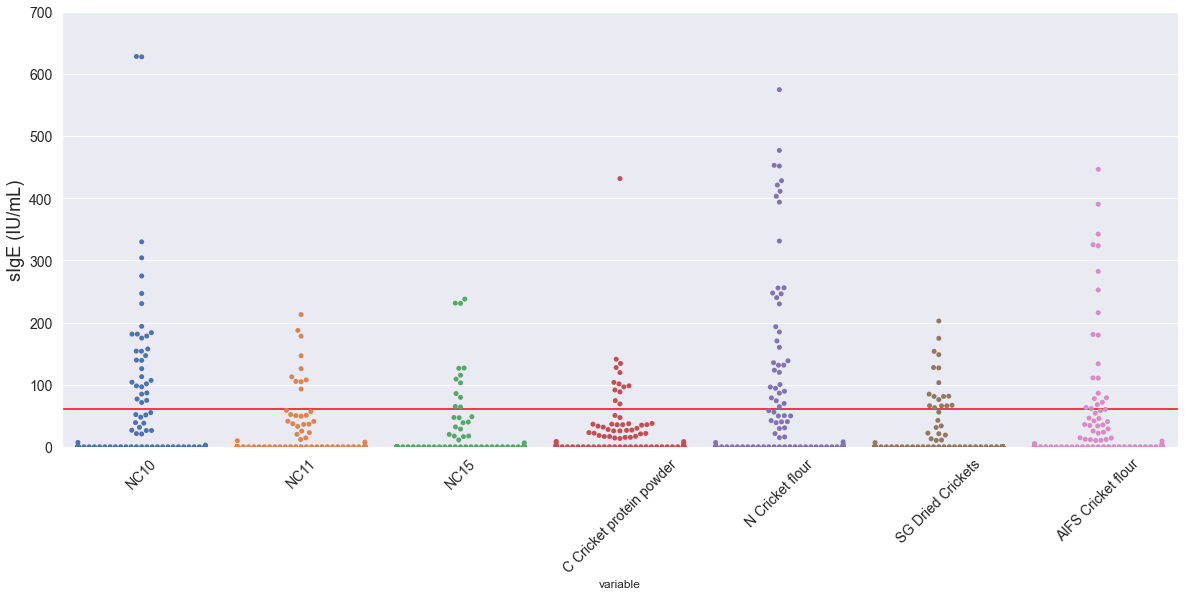

In [86]:
# Overall swarmplot
graph = sns.swarmplot(x="variable", y="value", data=pd.melt(insect_df.iloc[:,34:41]),
                      size=5)
graph.axhline(y=cut_off, color="red")

ax = plt.gca()
ax.set_ylim([0, 700])
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel("BSF novel foods", fontsize=18)
plt.ylabel("sIgE (IU/mL)", fontsize=18)
plt.xticks(rotation=45)

Compare between the different feeds

In [105]:
bsf_wt.columns

Index(['BSF-WT CF70', 'BSF-WT P', 'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH',
       'BSF-WT SBM', 'BSF-WT OKA'],
      dtype='object')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cann

BSF-WT CF70 vs. BSF-WT P: Custom statistical test, P_val:6.319e-01
BSF-WT CF70 vs. BSF-WT PKM: Custom statistical test, P_val:6.777e-01
BSF-WT CF70 vs. BSF-WT M<P: Custom statistical test, P_val:1.258e-01
BSF-WT CF70 vs. BSF-WT COH: Custom statistical test, P_val:6.041e-01
BSF-WT CF70 vs. BSF-WT SBM: Custom statistical test, P_val:4.415e-09
BSF-WT CF70 vs. BSF-WT OKA: Custom statistical test, P_val:6.661e-01


(<AxesSubplot:ylabel='sIgE (IU/mL)'>,
  <statannotations.Annotation.Annotation at 0x186b25cf4c0>])

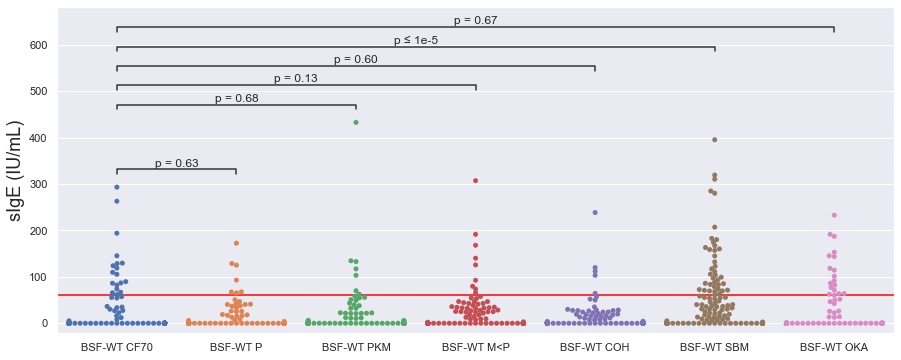

In [118]:
bsf_wt = insect_df.iloc[:,18:25]
bsf_d = insect_df.iloc[:,25:30]

ax = sns.swarmplot(data=bsf_wt)
ax.axhline(y=cut_off, color="red")
sns.set(font_scale=7)
plt.ylabel("sIgE (IU/mL)", fontsize=18)

p_values = []
pairs = []

# Compare each group to the control BSF-WT CF70
for bsf in bsf_wt.columns:
    if bsf == "BSF-WT CF70":
        continue
    u, p = stats.mannwhitneyu(bsf_wt["BSF-WT CF70"], bsf_wt[bsf])
    p_values.append(p)
    pairs.append(("BSF-WT CF70", bsf))

sns.set(rc={'figure.figsize':(15,6)})
annotator = Annotator(ax, pairs, data=bsf_wt)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

No vs. Yes: Custom statistical test, P_val:8.941e-01
No     115
Yes     16
Name: Sensitised, dtype: int64


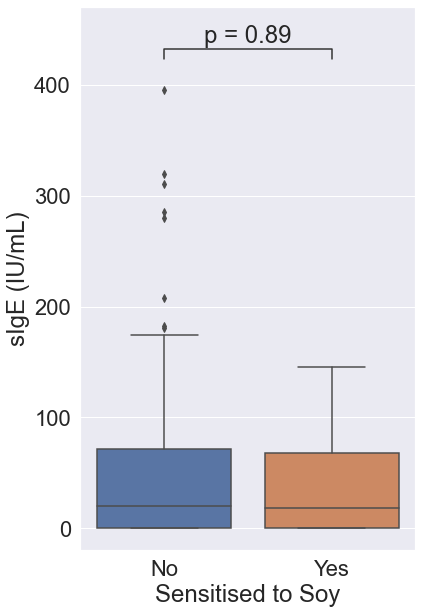

In [131]:
# Seems like SBM BSF have higher sensitisation. Let's look at their relationship to soy
sns.set(rc={'figure.figsize':(6,10)})
sns.set(font_scale=2)
ezboxplot("Soy", "BSF-WT SBM", cut_off, full_df)

BSF-D M<P vs. BSF-D M: Custom statistical test, P_val:4.868e-02
BSF-D M vs. BSF-D PKM: Custom statistical test, P_val:9.740e-03
BSF-D PKM vs. BSF-D NUS: Custom statistical test, P_val:1.477e-02
BSF-D NUS vs. BSF-D COH: Custom statistical test, P_val:8.283e-01


(<AxesSubplot:ylabel='sIgE (IU/mL)'>,
  <statannotations.Annotation.Annotation at 0x186b4923850>])

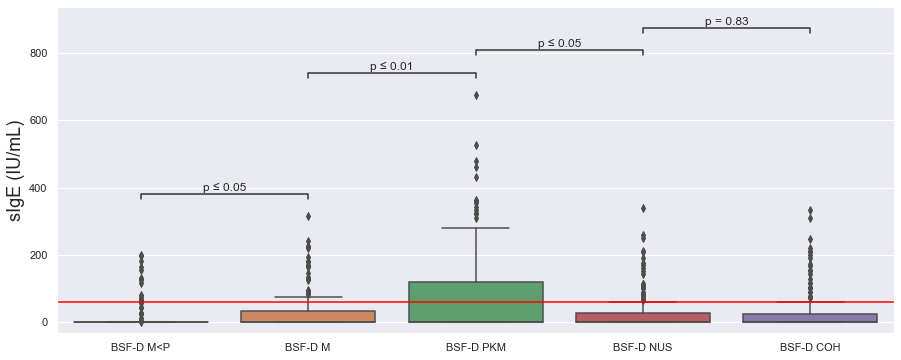

In [135]:
# For line D
ax = sns.boxplot(data=bsf_d)
ax.axhline(y=cut_off, color="red")
sns.set(font_scale=2)
plt.ylabel("sIgE (IU/mL)", fontsize=18)

p_values = []
pairs = []

# Compare each group to the control BSF-WT CF70
prev_col = ""
for bsf in bsf_d.columns:
    if prev_col == "":
        prev_col = bsf
        continue
    u, p = stats.mannwhitneyu(bsf_d[prev_col], bsf_d[bsf])
    p_values.append(p)
    pairs.append((prev_col, bsf))
    prev_col = bsf

sns.set(rc={'figure.figsize':(15,6)})
annotator = Annotator(ax, pairs, data=bsf_d)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

In [164]:
# Compare between WT and line D with the same feed
insect_df.columns

# In common are M<P, PKM and COH
feed = "PKM"
wt = "BSF-WT " + feed
d = "BSF-D " + feed

# sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(5,8)})
ax.set_ylim([0, 400])
ax = sns.boxplot(data=insect_df[[wt, d]])

ax.axhline(y=cut_off, color="red")

plt.ylabel("sIgE (IU/mL)", fontsize=18)
# plt.yticks(fontsize=14)

p_values = []
pairs = [(wt, d)]

u, p = stats.mannwhitneyu(insect_df[wt], insect_df[d])
p_values.append(p)

annotator = Annotator(ax, pairs, data=insect_df[[wt, d]])
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

KeyError: "['BSF-D CF70'] not in index"

## 2nd Level: Sensitisation to bases

For BSFs, we will take the entire average and compare to other bases

In [199]:
insect_df.columns

Index(['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'SGC Arginine kinase', 'BSF-WT CF70', 'BSF-WT P',
       'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour',
       'BSF Average', 'Cric Average'],
      dtype='object')

No vs. Yes: Custom statistical test, P_val:2.893e-01
No     96
Yes    35
Name: Sensitised, dtype: int64


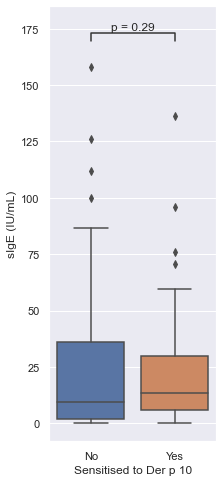

In [244]:
# Can use "BSF Average" in insect_df
ezboxplot("Der p 10", "BSF Average", cut_off, insect_df)

In [259]:
# Build the curve for trop/AK building for BSF
def sensitised(x):
    if x > cut_off:
        return 1
    return 0

insect_df["0"] = insect_df["Der p 10"].apply(sensitised)
insect_df["1"] = insect_df["Der p 20"].apply(sensitised)
insect_df["2"] = insect_df["Der f 10"].apply(sensitised)
insect_df["3"] = insect_df["Blo t 10"].apply(sensitised)
insect_df["4"] = insect_df["Blo t 20"].apply(sensitised)
insect_df["5"] = insect_df["BSF Tropomyosin 1"].apply(sensitised)
insect_df["6"] = insect_df["BSF Tropomyosin 2"].apply(sensitised)
insect_df["7"] = insect_df["BSF Arginine kinase"].apply(sensitised)
insect_df["8"] = insect_df["BSF Average"].apply(sensitised)

# Filter out those sensitised to BSF
bsf_sen_df = insect_df[insect_df["8"]  == 1]

# Add up sequentially the sensitisations of trop/AK
for i in range(1,8):
    bsf_sen_df[str(i)] += bsf_sen_df[str(i-1)]
    
bsf_sen_df["7"].value_counts()

C:\Users\USER\AppData\Local\Temp/ipykernel_12568/3917191943.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsf_sen_df[str(i)] += bsf_sen_df[str(i-1)]


0    9
2    2
4    2
1    2
3    1
5    1
Name: 7, dtype: int64

In [274]:
# Plot the building curve
percentages = []

for i in range(8):
    percentages.append(len(bsf_sen_df[bsf_sen_df[str(i)] > 0]) / len(bsf_sen_df))
    
# Convert into df
percen_df = pd.DataFrame(percentages)
percen_df = percen_df.transpose()
percen_df.columns = ["Der p 10", "Der p 20", "Der f 10", "Blo t 10", "Blo t 20",
                     "BSF Tropomyosin 1", "BSF Tropomyosin 2", "BSF Arginine kinase"]

percentages

[0.23529411764705882,
 0.23529411764705882,
 0.23529411764705882,
 0.29411764705882354,
 0.4117647058823529,
 0.4117647058823529,
 0.47058823529411764,
 0.47058823529411764]

## 3rd Level: Heat Treatment

For BSFs

In [175]:
insect_cooked = insect_cooked.rename(columns={"BSF-WT MIX1 #": "BSF-WT M<P #",
                              "BSF-D MIX1 #": "BSF-D M<P #"})
insect_cooked.columns

Index(['BSF-WT CF70 #', 'BSF-WT PKM #', 'BSF-WT M<P #', 'BSF-WT COH #',
       'BSF-WT SBM #', 'BSF-WT OKA #', 'BSF-WT P #', 'BSF-D PKM #',
       'BSF-D M<P #', 'BSF-D COH #', 'BSF-D M #', 'BSF-D NUS #', 'NC10 #',
       'NC11 #', 'NC15 #', 'C Cricket protein powder #', 'N Cricket flour #',
       'AIFS Cricket flour #', 'SG Canned BSF #', 'SG Dried BSF #',
       'SG Dried Crickets #', 'IFT Dried BSF Larvae #', 'Insectta BSF meal #'],
      dtype='object')

BSF-D COH vs. BSF-D COH #: Custom statistical test, P_val:2.526e-02


(<AxesSubplot:ylabel='sIgE (IU/mL)'>,
 [<statannotations.Annotation.Annotation at 0x186b7c66700>])

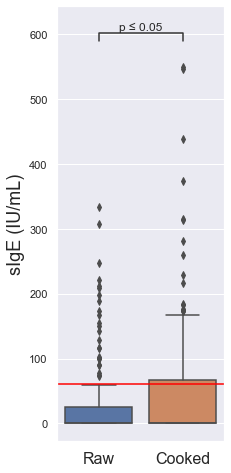

In [194]:
type = "D"
feed = "COH"
raw = "BSF-" + type + " " + feed
cooked = raw + " #"
bsf_heat_df = pd.concat([insect_df[raw], insect_cooked[cooked]], axis=1)

sns.set(rc={'figure.figsize':(3,8)})
# ax.set_ylim([0, 400])
ax = sns.boxplot(data=bsf_heat_df)

ax.axhline(y=cut_off, color="red")

plt.ylabel("sIgE (IU/mL)", fontsize=18)
plt.xticks([0, 1], ["Raw", "Cooked"], fontsize=16)

p_values = []
pairs = [(raw, cooked)]

u, p = stats.mannwhitneyu(insect_df[raw], insect_cooked[cooked])
p_values.append(p)

annotator = Annotator(ax, pairs, data=bsf_heat_df)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)